Overfit Tree Train Accuracy: 1.0
Shallow Tree Train Accuracy: 0.9733333333333334
Decision Tree Test Accuracy: 1.0
Random Forest Test Accuracy: 1.0


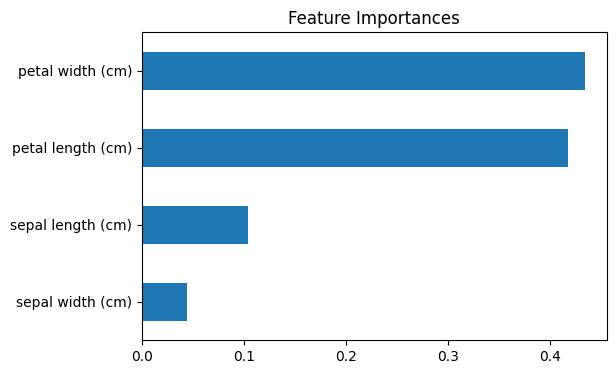

Decision Tree CV Accuracy: 0.9733333333333334
Random Forest CV Accuracy: 0.9666666666666668


In [1]:
# ================================
# Task 5: Decision Trees & Random Forests
# Tools: Scikit-learn, Graphviz
# ================================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import graphviz

# ================================
# 2. Load Dataset (Iris)
# ================================
iris = load_iris()
X, y = iris.data, iris.target

# ================================
# 3. Train a Decision Tree Classifier
# ================================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Visualize the Decision Tree
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as decision_tree.pdf
graph

# ================================
# 4. Analyze Overfitting (Control Depth)
# ================================
dt_overfit = DecisionTreeClassifier(random_state=42)  # no depth limit
dt_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_overfit.fit(X, y)
dt_shallow.fit(X, y)

print("Overfit Tree Train Accuracy:", dt_overfit.score(X, y))
print("Shallow Tree Train Accuracy:", dt_shallow.score(X, y))

# ================================
# 5. Train/Test Split and Random Forest
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree (limited depth)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Decision Tree Test Accuracy:", dt_model.score(X_test, y_test))
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))

# ================================
# 6. Feature Importances
# ================================
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=iris.feature_names)

plt.figure(figsize=(6,4))
feat_imp.sort_values().plot(kind="barh", title="Feature Importances")
plt.show()

# ================================
# 7. Cross-Validation
# ================================
dt_cv = DecisionTreeClassifier(max_depth=3, random_state=42)
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

scores_dt = cross_val_score(dt_cv, X, y, cv=5)
scores_rf = cross_val_score(rf_cv, X, y, cv=5)

print("Decision Tree CV Accuracy:", scores_dt.mean())
print("Random Forest CV Accuracy:", scores_rf.mean())
